In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(42)

In [36]:
# from neural_network.utils import * 
from neural_network_deprecated.blocks import MyLinearModel
from neural_network_deprecated.loss import CrossEntropy

In [3]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data(data_dir="neural_network/datasets")

y = 1. It's a cat picture.


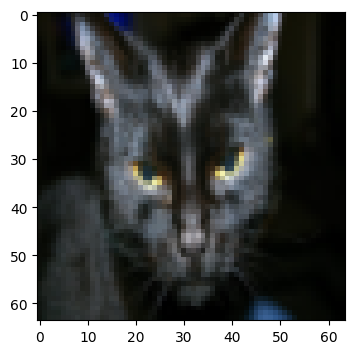

In [4]:
# Example of a picture
index = 25
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [5]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [14]:
# Preprocess your dataset 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T
train_x = train_x_flatten/255
test_x = test_x_flatten/255
print(train_x.shape)
print(test_x.shape)
print(train_y)

(12288, 209)
(12288, 50)
[[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
  0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1
  1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0
  1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1
  0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]]


In [15]:
# build your model 
layers_dim = [12288, 20, 7, 5, 1]

In [42]:
def my_train(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    costs = [] 
    my_model = MyLinearModel(layers_dim)
    loss = CrossEntropy()
    for i in range(num_iterations):
        
        AL, caches = my_model.forward(X)
        cost = loss.forward(AL, Y)
        if i == 0:
            print(AL)
            print(caches)
            print(cost)
            break
        dAL = loss.backward(AL, Y)
        grads = my_model.backward(AL, caches)
        my_model.update(grads, learning_rate)
        if i%100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost at iteration{i}: {cost}")
    plt.plot(np.squeeze(costs))
    plt.xlabel('iterations (per 100)')
    plt.ylabel('cost')
    plt.title(f'Learning rate={learning_rate}')
    return parameters, costs 

In [43]:
def train(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    costs = [] 
    parameters = initialize_parameters(layers_dims)
    
    for i in range(num_iterations):
        
        AL, caches = deep_linear_activation_forward(X, parameters)
       
        cost = cross_entropy(AL, Y)
        grads = deep_linear_activation_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)
        if i%100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost at iteration{i}: {cost}")
    plt.plot(np.squeeze(costs))
    plt.xlabel('iterations (per 100)')
    plt.ylabel('cost')
    plt.title(f'Learning rate={learning_rate}')
    return parameters, costs 

[[0.59634542 0.56789942 0.61452017 0.49397892 0.51228128 0.51245364
  0.52595197 0.5140159  0.60755059 0.50752137 0.56041835 0.52957099
  0.56385924 0.56912811 0.57078841 0.5650848  0.53198153 0.52057159
  0.59117505 0.58482727 0.53616097 0.50312792 0.56162374 0.53504651
  0.64216592 0.48356786 0.47551525 0.6132903  0.46771146 0.47353183
  0.51668678 0.66445695 0.52495392 0.61234859 0.52551749 0.5580789
  0.5982856  0.60386567 0.5119328  0.5664874  0.4927356  0.53255432
  0.52985115 0.55415699 0.58662451 0.49917321 0.55526783 0.58739836
  0.48827584 0.56376992 0.58578665 0.53382417 0.56565073 0.61687608
  0.49262633 0.54216818 0.55461693 0.59569679 0.52672927 0.5339165
  0.57419178 0.53356509 0.55756068 0.52791813 0.56456481 0.57814925
  0.53885716 0.55976386 0.53519313 0.56206944 0.55086066 0.5735877
  0.51274409 0.52453133 0.63123273 0.57427033 0.51217576 0.53061524
  0.48070784 0.50014948 0.52795716 0.5862855  0.51168265 0.49979
  0.53446892 0.5255914  0.56032663 0.50860146 0.568052

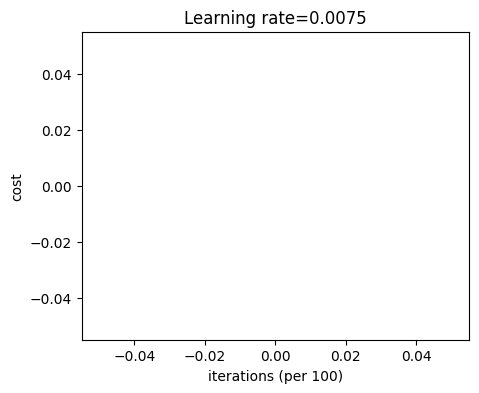

In [44]:
parameters, costs = my_train(train_x, train_y, layers_dim, learning_rate=0.0075, num_iterations=3000, print_cost=True)

Cost at iteration0: 0.7717493284237686
Cost at iteration100: 0.6720534400822913
Cost at iteration200: 0.6482632048575212
Cost at iteration300: 0.6115068816101356
Cost at iteration400: 0.567047326836611
Cost at iteration500: 0.5401376634547801
Cost at iteration600: 0.5279299569455267
Cost at iteration700: 0.4654773771766851
Cost at iteration800: 0.369125852495928
Cost at iteration900: 0.39174697434805344
Cost at iteration1000: 0.31518698886006163
Cost at iteration1100: 0.2726998441789385
Cost at iteration1200: 0.23741853400268137
Cost at iteration1300: 0.19960120532208644
Cost at iteration1400: 0.18926300388463305
Cost at iteration1500: 0.16118854665827753
Cost at iteration1600: 0.14821389662363318
Cost at iteration1700: 0.13777487812972944
Cost at iteration1800: 0.12974017549190123
Cost at iteration1900: 0.12122535068005211
Cost at iteration2000: 0.1138206066863371
Cost at iteration2100: 0.10783928526254132
Cost at iteration2200: 0.10285466069352679
Cost at iteration2300: 0.10089745445

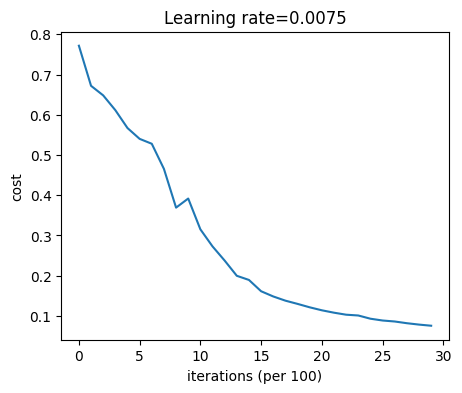

In [34]:
parameters, costs = train(train_x, train_y, layers_dim, learning_rate=0.0075, num_iterations=3000, print_cost=True)